In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Задание №1

In [221]:
data = pd.read_csv('cars_moldova_clean.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  int64  
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


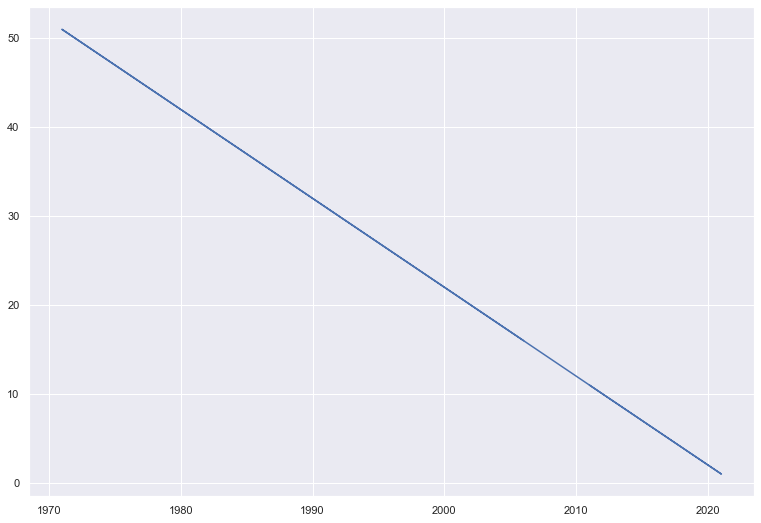

In [222]:
#Интересная зависимость
plt.plot(data.Year,data.Age)
plt.show()

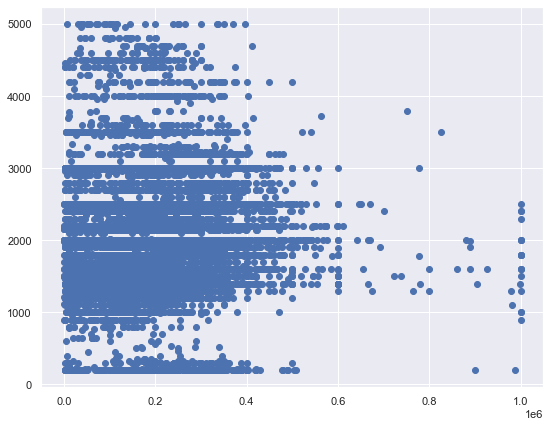

In [223]:
#Scatters через matplotlib
fig = plt.subplots(figsize=(9, 7))
plt.scatter(data.Distance, data['Engine_capacity(cm3)'])
plt.show()

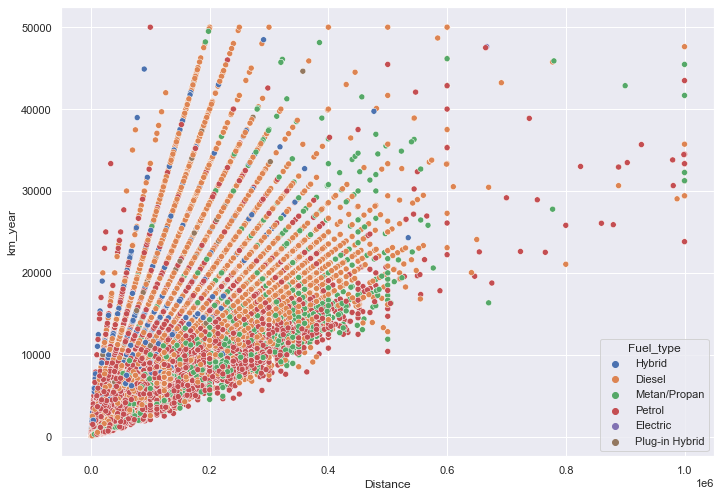

In [224]:
#Scatters через seaborn вместе с категориальным признаком Fuel_type через hue
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x='Distance', y='km_year', hue='Fuel_type')
plt.show()

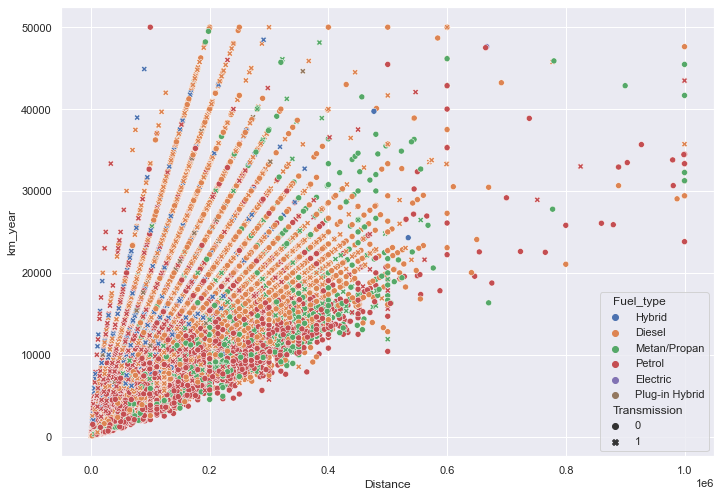

In [225]:
#Добавили категориальный признак Transmission через style 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x='Distance', y='km_year', hue='Fuel_type', style='Transmission')
plt.show()

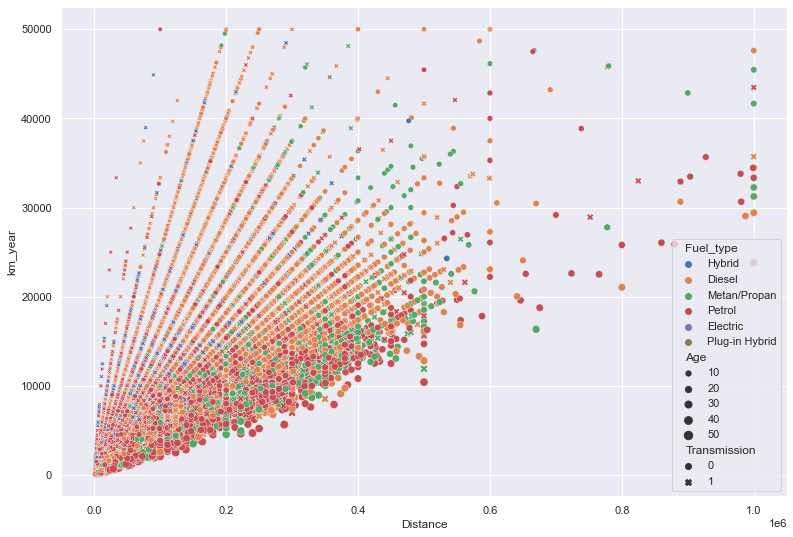

In [226]:
#Добавили категориальный признак Age через size 
sns.set(rc={'figure.figsize':(13,9)})
sns.scatterplot(data=data, x='Distance', y='km_year', hue='Fuel_type', style='Transmission',size='Age')
plt.show()

In [227]:
#Для красивого "пирога" вернем вместо 0 и 1 первоначальные обозначения
pie_data = data.copy()

pie_data['Transmission'] = pie_data['Transmission'].apply(str)
pie_data['Transmission'] = pie_data['Transmission'].map({str(1): 'Automatic', str(0): 'Manual'})

pie_data.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636


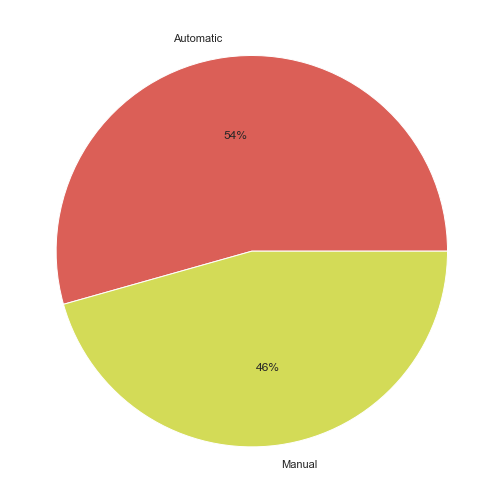

In [228]:
#Создаем наш "пирог"
colors = sns.color_palette('hls')[0:5]
plt.pie(pie_data['Transmission'].value_counts(), labels = pie_data['Transmission'].unique(), colors = colors, autopct='%.0f%%')
plt.show()

# Задание №2

In [229]:
df = data.copy()

In [230]:
#Создаем новый признак
df['Price_per_distance'] = df['Price(euro)']/df.Distance
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_per_distance
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727,0.039744
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000,0.063333
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000,0.059545
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000,0.020500
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636,0.011633


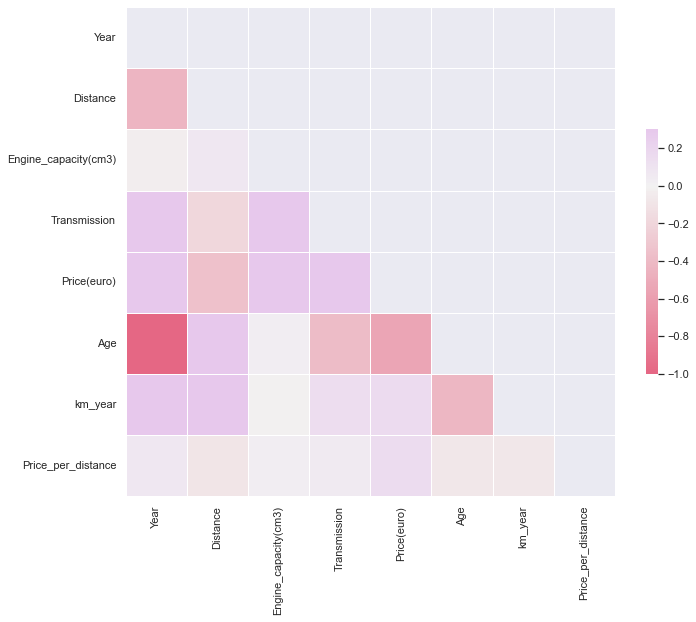

In [231]:
#Проверям корреляцию
corr = df.corr()

#Создаем визуализацию для корреляции
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(1, 300,70,60, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Задание №3

In [232]:
#Возьмем разделение колонок из предоставленных блокнотов
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']

## Стандартизация.

In [233]:
#Проведем стандартизацию
df_new  = df.copy()
df_new[num_columns] = (df[num_columns]-df[num_columns].mean())/df[num_columns].std()
df_new.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_per_distance
0,Toyota,Prius,0.376492,Hatchback,0.128983,-0.112516,Hybrid,1,-0.179081,11,17727.272727,0.039744
1,Renault,Grand Scenic,0.793761,Universal,-0.490816,-0.604496,Diesel,0,-0.095044,8,16875.000000,0.063333
2,Renault,Laguna,0.515582,Universal,-0.749065,-0.604496,Diesel,0,-0.305136,10,11000.000000,0.059545
3,Opel,Astra,-0.318957,Universal,0.180633,-0.440503,Metan/Propan,0,-0.562500,16,12500.000000,0.020500
4,Mercedes,Vito,-1.153495,Microvan,1.213632,0.543457,Diesel,0,-0.626578,22,13636.363636,0.011633


In [234]:
#Сохраним в файл
df_new.to_csv('after_standartization.csv')

<AxesSubplot:xlabel='Distance', ylabel='Count'>

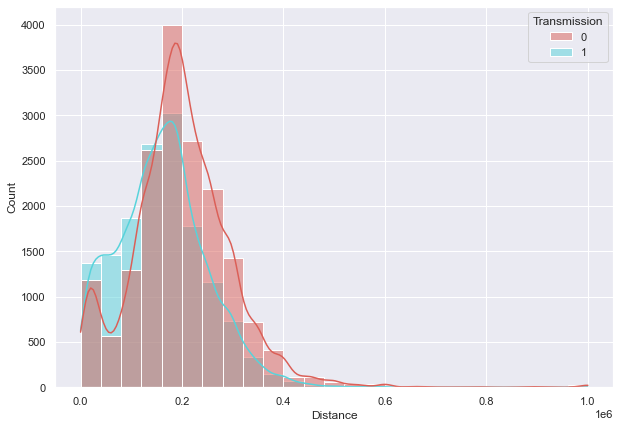

In [235]:
#Визуализация оригинальных данных
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 25, kde = True,
             palette='hls')

<AxesSubplot:xlabel='Distance', ylabel='Count'>

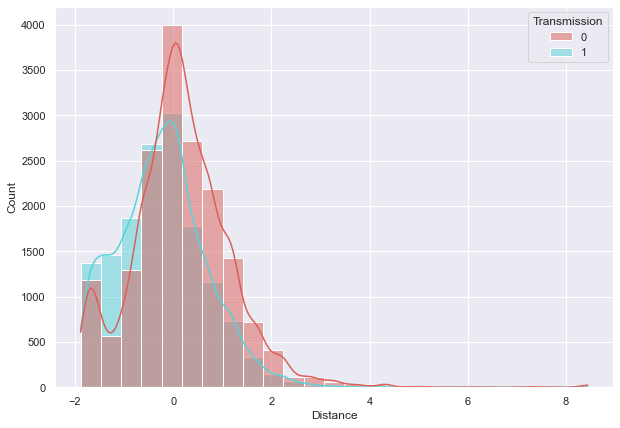

In [236]:
#Визуализация новых данных
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_new,
             x = 'Distance',
             hue = 'Transmission',
             bins = 25, kde = True,
             palette='hls')

## Нормализация

In [237]:
df_new  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_new[num_columns] = (df[num_columns]- Xmin)/(Xmax - Xmin)
df_new.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_per_distance
0,Toyota,Prius,0.80,Hatchback,0.194919,0.333333,Hybrid,1,0.075651,11,17727.272727,0.039744
1,Renault,Grand Scenic,0.86,Universal,0.134913,0.270833,Diesel,0,0.083667,8,16875.000000,0.063333
2,Renault,Laguna,0.82,Universal,0.109911,0.270833,Diesel,0,0.063627,10,11000.000000,0.059545
3,Opel,Astra,0.70,Universal,0.199920,0.291667,Metan/Propan,0,0.039078,16,12500.000000,0.020500
4,Mercedes,Vito,0.58,Microvan,0.299930,0.416667,Diesel,0,0.032966,22,13636.363636,0.011633


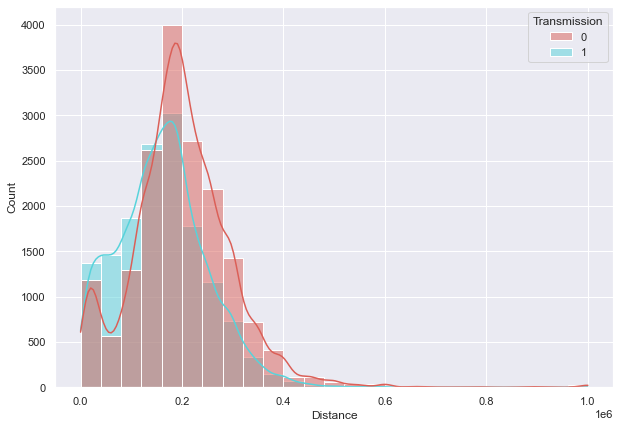

In [238]:
#Визуализация оригинальных данных
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 25, kde = True,
             palette='hls')
plt.show()

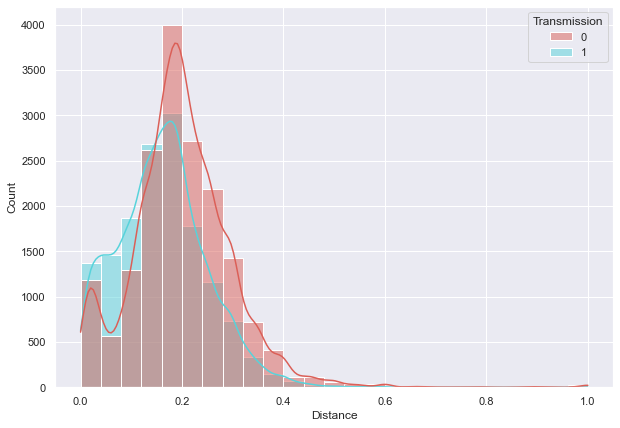

In [239]:
#Визуализация новых данных
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_new,
             x = 'Distance',
             hue = 'Transmission',
             bins = 25, kde = True,
             palette='hls')
plt.show()

In [240]:
df_new.to_csv('after_normalization.csv')

## Cтепенное преобразование 

In [241]:
df_new  = df.copy()
df_new[num_columns] = np.log(df_new[num_columns])
df_new.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_per_distance
0,Toyota,Prius,7.606387,Hatchback,12.180755,7.495542,Hybrid,1,8.955448,11,17727.272727,0.039744
1,Renault,Grand Scenic,7.607878,Universal,11.813030,7.313220,Diesel,0,9.053687,8,16875.000000,0.063333
2,Renault,Laguna,7.606885,Universal,11.608236,7.313220,Diesel,0,8.787220,10,11000.000000,0.059545
3,Opel,Astra,7.603898,Universal,12.206073,7.377759,Metan/Propan,0,8.318742,16,12500.000000,0.020500
4,Mercedes,Vito,7.600902,Microvan,12.611538,7.696213,Diesel,0,8.157657,22,13636.363636,0.011633


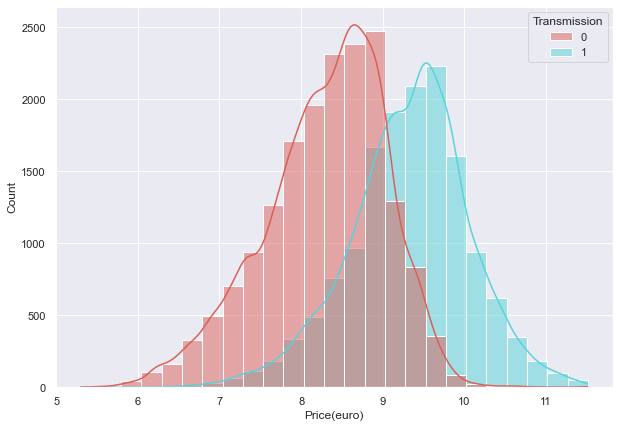

In [242]:
#Визуализация степенного преобразования
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df_new,
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 25,kde = True,
             palette='hls')
plt.show()

In [243]:
df_new.to_csv('after_log.csv')

## Ordinal / One-Hot Encoding

Для проведения ordinal encoding решил сначала создать новое категорийное значение и затем его преобразовать.
В начале изучил квартильное разделение столбца 'Engine_capacity(cm3)'.

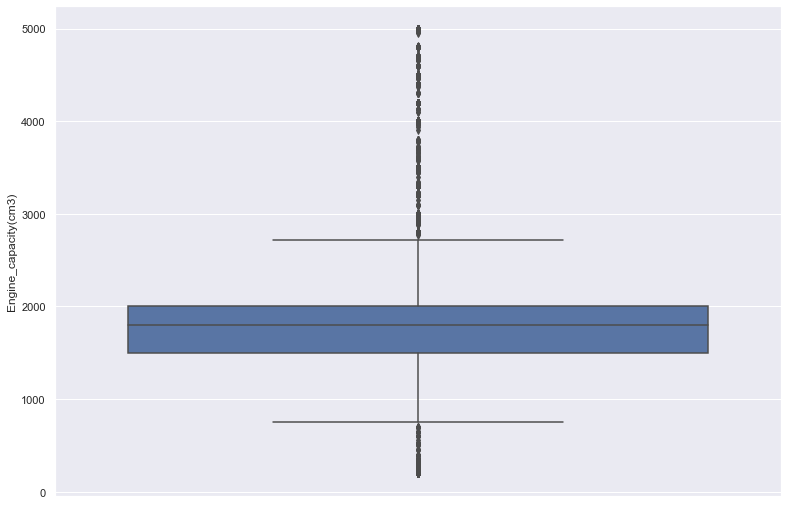

In [244]:
sns.boxplot(y=data['Engine_capacity(cm3)'])
plt.show()

In [245]:
#Разбиваем 'Engine_capacity(cm3)' на три категории в зависимости от того в каком квартиле они находятся
conditions = [
    (df['Engine_capacity(cm3)'] <= data['Engine_capacity(cm3)'].quantile(0.25)),
    (df['Engine_capacity(cm3)'] > data['Engine_capacity(cm3)'].quantile(0.25)) & (df['Engine_capacity(cm3)'] < data['Engine_capacity(cm3)'].quantile(0.75)),
    (df['Engine_capacity(cm3)'] >= data['Engine_capacity(cm3)'].quantile(0.75))
]

values = ['Low','Meduim','High']
df['Engine_Type'] = np.select(conditions,values)
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_per_distance,Engine_Type
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727,0.039744,Meduim
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000,0.063333,Low
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000,0.059545,Low
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000,0.020500,Meduim
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636,0.011633,High


In [246]:
#Ordinal Encoding
df['Engine_Type'] = df['Engine_Type'].map({'Low': 0, 'Meduim': 1,'High':2})
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Price_per_distance,Engine_Type
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727,0.039744,1
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000,0.063333,0
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000,0.059545,0
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000,0.020500,1
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636,0.011633,2


In [247]:
#Как и все прошлые преобразования сохраняем в отдельный файл согласно тексту задания.
df.to_csv('after_ordinal_encoding.csv')